In [7]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_gate_map
from qiskit.tools.monitor import job_monitor
from qiskit.test.mock import FakeProvider
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
backends = list(filter(lambda x:
not (x.configuration().simulator or
    x.configuration().n_qubits <= 5),
                       FakeProvider().backends()))

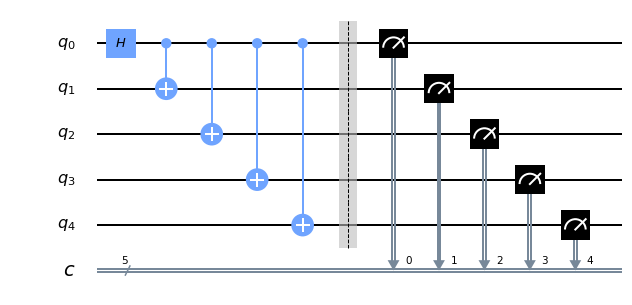

In [9]:
ghz = QuantumCircuit(5, 5)
ghz.h(0)
for idx in range(1, 5):
    ghz.cx(0, idx)
ghz.barrier()
ghz.measure(range(5), range(5))
ghz.draw(output='mpl')

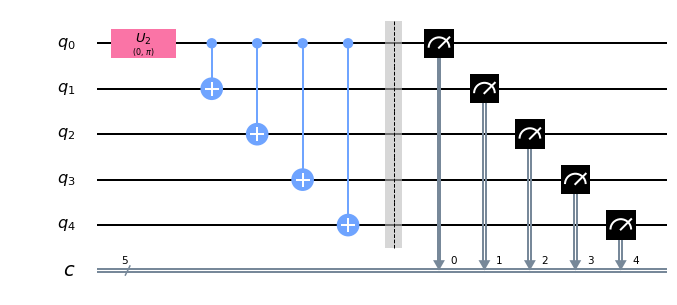

In [10]:
ghz_basis = ghz.decompose()
ghz_basis.draw(output='mpl')

In [11]:
import inspect
inspect.signature(transpile)

<Signature (circuits, backend=None, basis_gates=None, coupling_map=None, backend_properties=None, initial_layout=None, seed_transpiler=None, optimization_level=None, pass_manager=None, callback=None, output_name=None)>

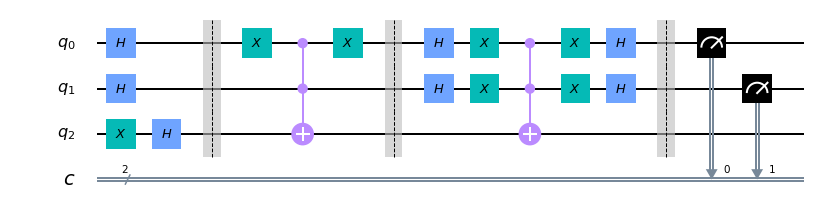

In [12]:
qc = QuantumCircuit(3, 2)
# Preparation using superposition
qc.h(0)
qc.h(1)
qc.x(2)
qc.h(2)
qc.barrier()

# Function Uw
qc.x(0)
qc.ccx(0, 1, 2)
qc.x(0)
qc.barrier()

# Function Us
qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.ccx(0, 1, 2)
qc.x(0)
qc.x(1)
qc.h(0)
qc.h(1)
qc.barrier()

# Measure
qc.measure([0, 1], [0, 1])
qc.draw(output='mpl')

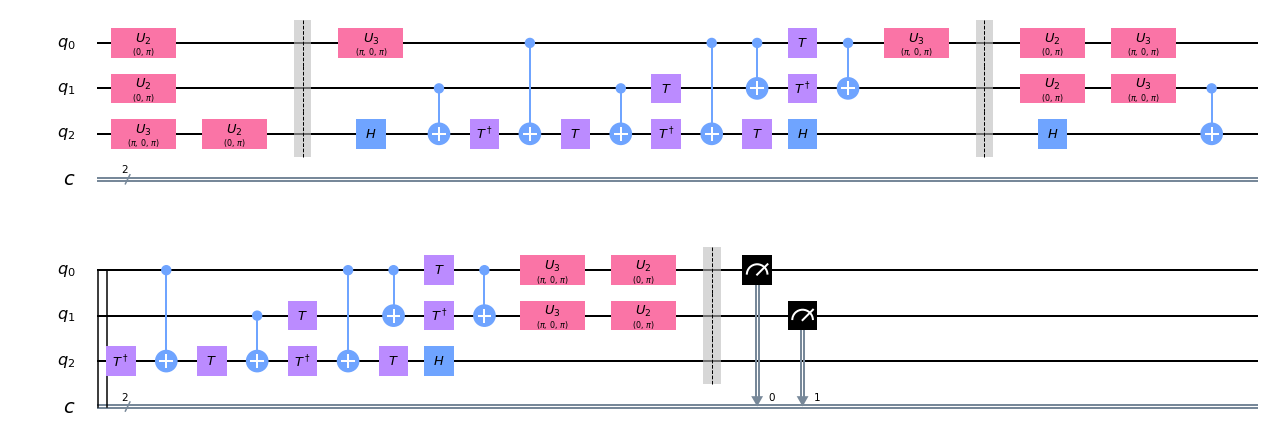

In [13]:
qc_basis = qc.decompose()
qc_basis.draw(output='mpl')

In [14]:
print(qc.depth(), ', ', qc_basis.depth())

11 ,  29


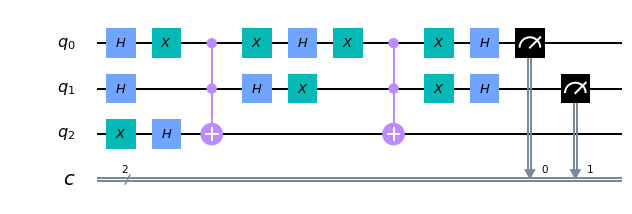

In [15]:
# Without barrier

qc = QuantumCircuit(3, 2)
# Preparation using superposition
qc.h(0)
qc.h(1)
qc.x(2)
qc.h(2)

# Function Uw
qc.x(0)
qc.ccx(0, 1, 2)
qc.x(0)

# Function Us
qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.ccx(0, 1, 2)
qc.x(0)
qc.x(1)
qc.h(0)
qc.h(1)

# Measure
qc.measure([0, 1], [0, 1])
qc.draw(output='mpl')

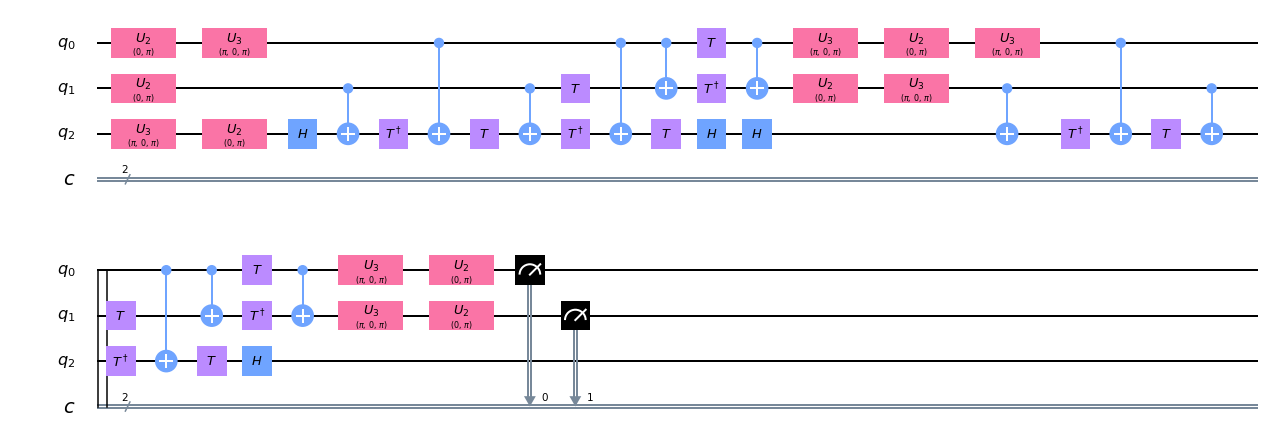

In [16]:
qc_basis = qc.decompose()
qc_basis.draw(output='mpl')

In [17]:
print(qc.depth(), ', ', qc_basis.depth())

10 ,  28
